<a href="https://colab.research.google.com/github/Snehanjaliuppu/AIML-2025/blob/main/project_ADM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Smart Accident Detection and Hospital Alert System Using Data **Mining**

In [1]:
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import seaborn as sns

Load datasets **bold text**

In [2]:
accidents_df = pd.read_csv('/content/sample_us_accidents.csv')
hospitals_df = pd.read_csv('/content/sample_us_hospitals (2).csv')

Rename and **clean**

In [3]:
accidents_df.rename(columns={'Start_Lat': 'Acc_Lat', 'Start_Lng': 'Acc_Lng'}, inplace=True)
hospitals_df.rename(columns={'Latitude': 'Hosp_Lat', 'Longitude': 'Hosp_Lng', 'NAME': 'Hospital_Name'}, inplace=True)
accidents_df.dropna(subset=['Acc_Lat', 'Acc_Lng'], inplace=True)
hospitals_df.dropna(subset=['Hosp_Lat', 'Hosp_Lng'], inplace=True)


Find nearest **hospital**

In [4]:
def find_nearest_hospital(accident_row):
    acc_loc = (accident_row['Acc_Lat'], accident_row['Acc_Lng'])
    hospitals_df['Distance'] = hospitals_df.apply(
        lambda row: geodesic(acc_loc, (row['Hosp_Lat'], row['Hosp_Lng'])).miles,
        axis=1
    )
    nearest = hospitals_df.loc[hospitals_df['Distance'].idxmin()]
    return pd.Series({
        'Nearest_Hospital': nearest['Hospital_Name'],
        'Hospital_Lat': nearest['Hosp_Lat'],
        'Hospital_Lng': nearest['Hosp_Lng'],
        'Distance_miles': nearest['Distance']
    })

nearest_hospital_data = accidents_df.head(100).apply(find_nearest_hospital, axis=1)

Merge and **Save**

In [5]:
enhanced_df = pd.concat([accidents_df.head(100).reset_index(drop=True), nearest_hospital_data], axis=1)
enhanced_df.to_csv('/content/enhanced_us_accidents_with_hospitals.csv', index=False)

print("File saved as '/content/enhanced_us_accidents_with_hospitals.csv'")
print(enhanced_df.head())


File saved as '/content/enhanced_us_accidents_with_hospitals.csv'
   ID           Start_Time  Acc_Lat   Acc_Lng  Severity  Visibility(mi)  \
0  A1  2021-01-01 08:00:00  34.0522 -118.2437         2            10.0   
1  A2  2021-01-02 14:30:00  36.1699 -115.1398         3             8.0   
2  A3  2021-01-03 18:45:00  40.7128  -74.0060         4             5.0   

   Temperature(F)  Humidity(%)  Pressure(in)  Wind_Speed(mph)  \
0              70           40          30.0              5.0   
1              85           30          29.8              3.2   
2              60           70          30.1             10.5   

  Weather_Condition   Nearest_Hospital  Hospital_Lat  Hospital_Lng  \
0             Clear  LA Medical Center       34.0622     -118.2537   
1              Rain     Vegas Hospital       36.1690     -115.1408   
2               Fog         NYC Health       40.7138      -74.0050   

   Distance_miles  
0        0.896747  
1        0.083523  
2        0.086707  


 Visualizations
 Histogram of distances

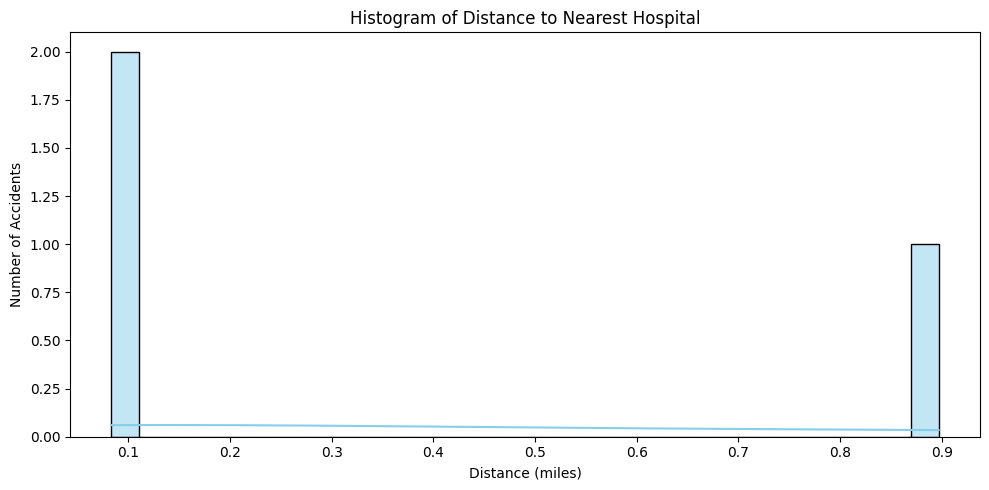

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(enhanced_df['Distance_miles'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Distance to Nearest Hospital')
plt.xlabel('Distance (miles)')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

Pie chart of top 5 nearest hospitals

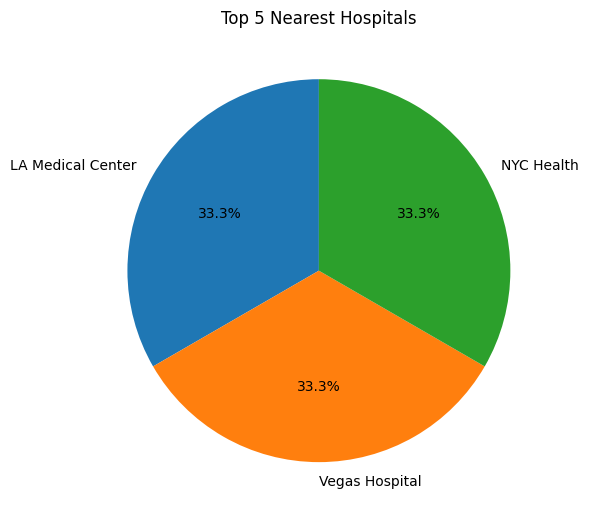

In [7]:
top_hospitals = enhanced_df['Nearest_Hospital'].value_counts().nlargest(5)
plt.figure(figsize=(6, 6))
top_hospitals.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Nearest Hospitals')
plt.ylabel('')
plt.tight_layout()
plt.show()


Bar chart of accident severity (if present)

<ipython-input-8-0b9374fd83e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=enhanced_df, x='Severity', palette='muted')


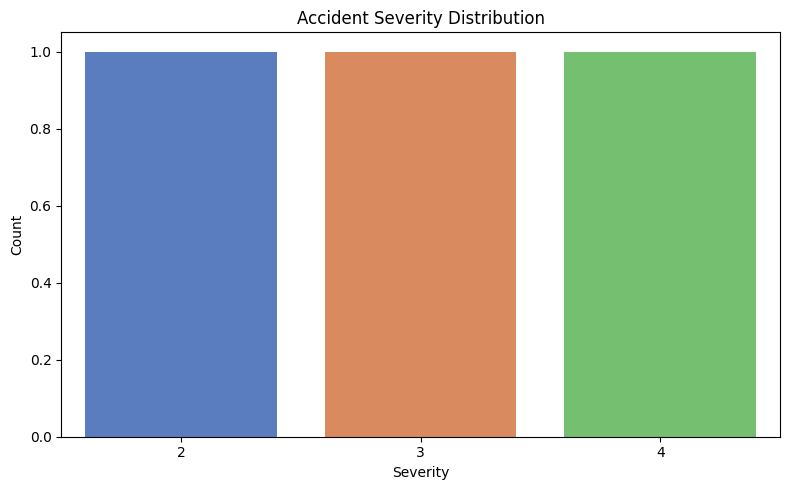

['ID', 'Start_Time', 'Acc_Lat', 'Acc_Lng', 'Severity', 'Visibility(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)', 'Weather_Condition']


In [8]:
if 'Severity' in enhanced_df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=enhanced_df, x='Severity', palette='muted')
    plt.title('Accident Severity Distribution')
    plt.xlabel('Severity')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    print(accidents_df.columns.tolist())